<a href="https://colab.research.google.com/github/haaris519/Get-Started-with-Python-Google/blob/main/Predicting_Future_Happiness_A_Comparative_Analysis_of_Country_Rankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
m

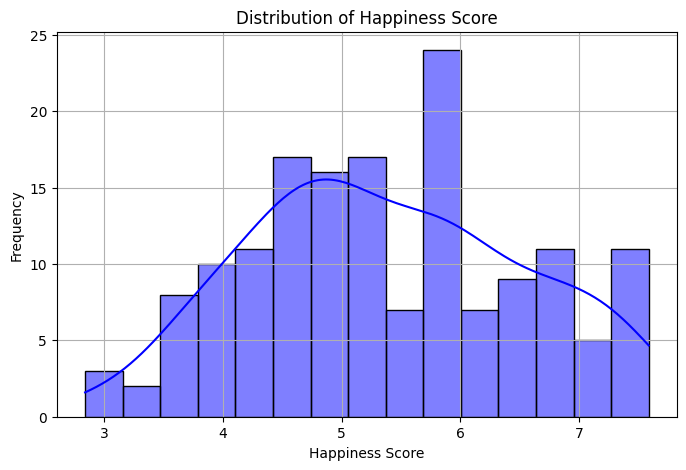

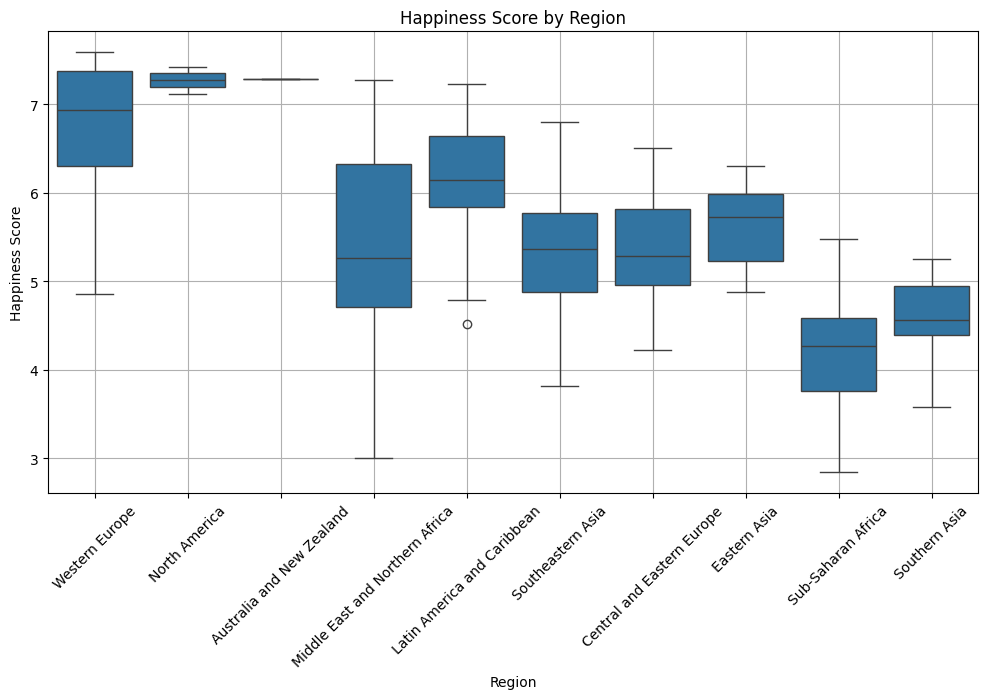

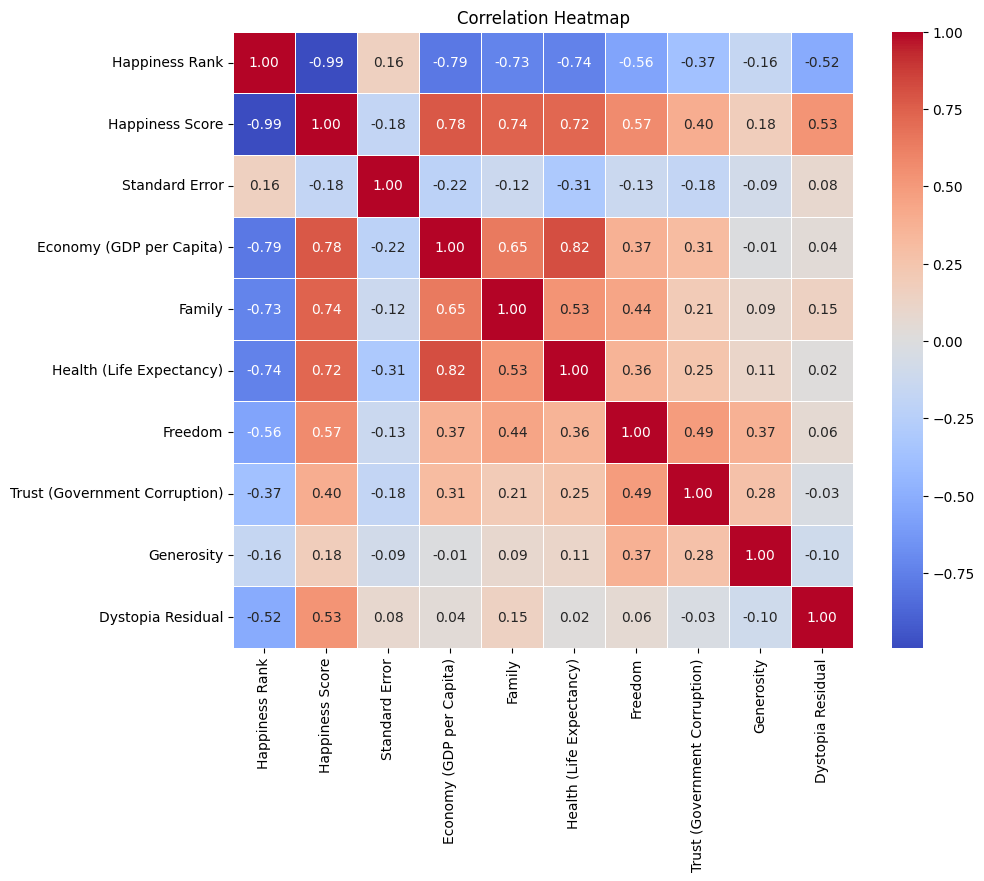

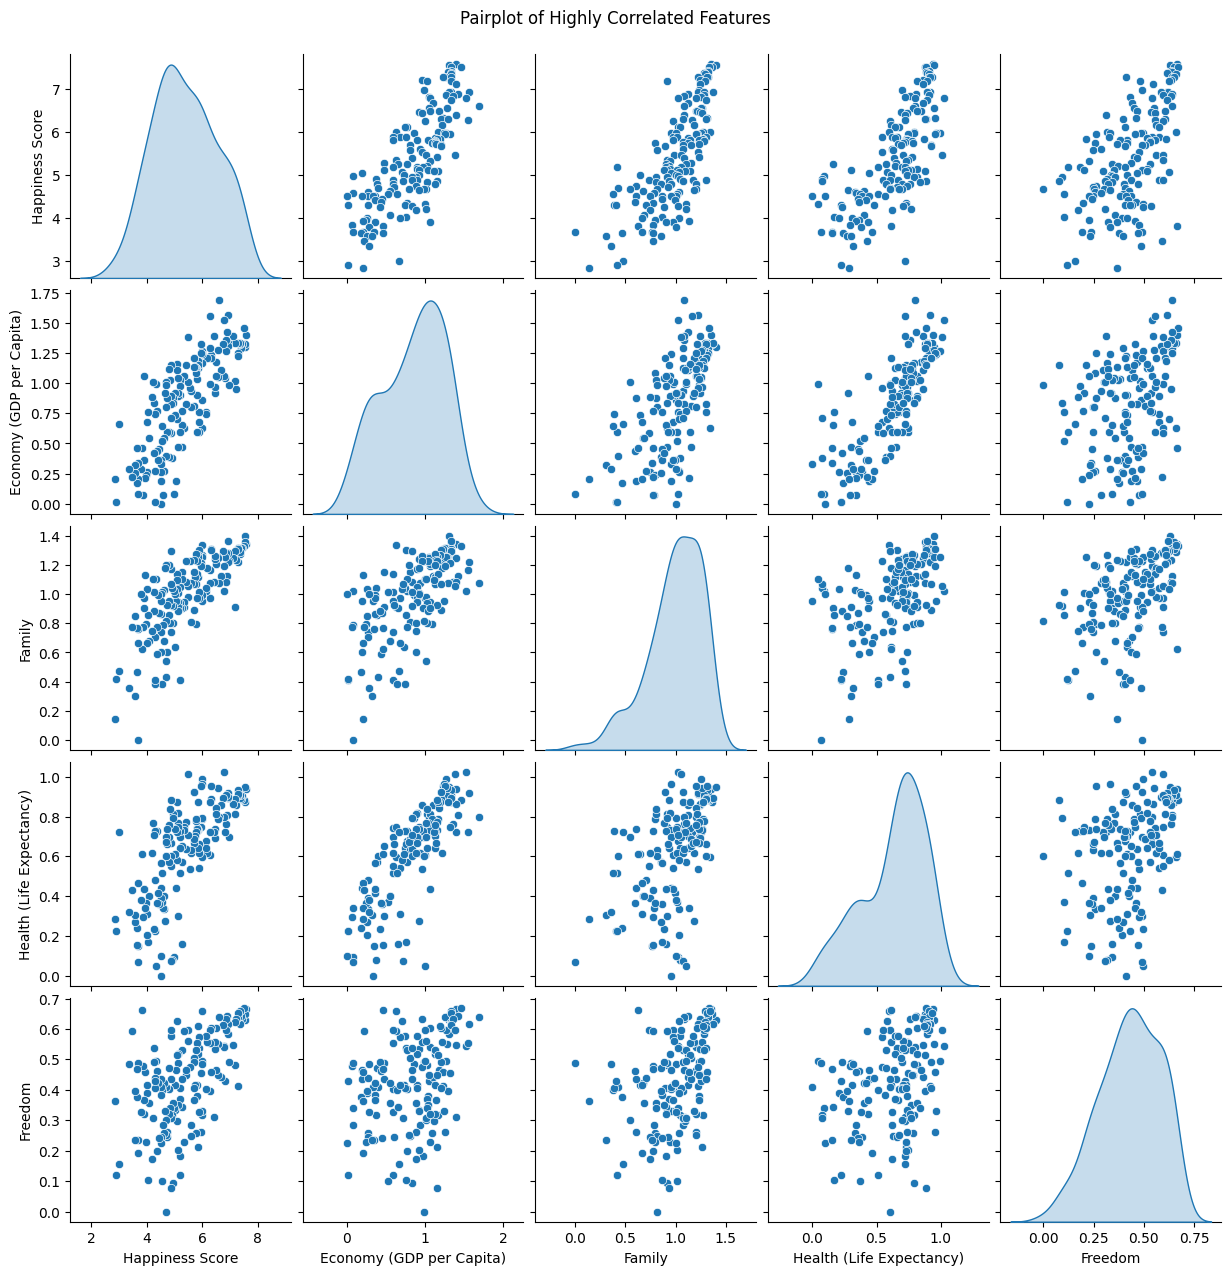


Top 10 Happiest Countries:
       Country                     Region  Happiness Score
0  Switzerland             Western Europe            7.587
1      Iceland             Western Europe            7.561
2      Denmark             Western Europe            7.527
3       Norway             Western Europe            7.522
4       Canada              North America            7.427
5      Finland             Western Europe            7.406
6  Netherlands             Western Europe            7.378
7       Sweden             Western Europe            7.364
8  New Zealand  Australia and New Zealand            7.286
9    Australia  Australia and New Zealand            7.284

Average Happiness Score by Region:
Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and East

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Info:")
print(data.info())

# Display first few rows of the dataset
print("\nFirst 5 rows:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
# 1. Distribution of Happiness Score
plt.figure(figsize=(8, 5))
sns.histplot(data['Happiness Score'], kde=True, color='blue', bins=15)
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 2. Happiness Score by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Region', y='Happiness Score')
plt.title("Happiness Score by Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()

# 3. Correlation heatmap
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# 4. Pairplot for highly correlated features
high_corr_features = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
                      'Health (Life Expectancy)', 'Freedom']
sns.pairplot(data[high_corr_features], diag_kind='kde', kind='scatter')
plt.suptitle("Pairplot of Highly Correlated Features", y=1.02)
plt.show()

# Insights and Observations
# Sort by Happiness Score
top_countries = data[['Country', 'Region', 'Happiness Score']].sort_values(by='Happiness Score', ascending=False).head(10)
print("\nTop 10 Happiest Countries:")
print(top_countries)



In [1]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/2015.csv'
data = pd.read_csv(file_path)

# Dynamic Scatter Plot: Economy vs. Happiness Score by Region
fig = px.scatter(
    data,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    color='Region',
    size='Health (Life Expectancy)',
    hover_name='Country',
    title='Happiness Score vs. Economy by Region',
    labels={'Economy (GDP per Capita)': 'GDP per Capita', 'Happiness Score': 'Happiness Score'},
    template='plotly',
)

# Display the chart
fig.show()


In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features and target variable
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']
X = data[features]
y = data['Happiness Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate Linear Regression
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Linear Regression Results:
Mean Squared Error: 0.23204639822946066
R-squared: 0.8364431446700109

Random Forest Regression Results:
Mean Squared Error: 0.23435172698124984
R-squared: 0.8348182441155468


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the dataset
file_path = '/content/2015.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']
X = data[features]
y = data['Happiness Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict current happiness scores (baseline)
data['Predicted Current Happiness'] = model.predict(X)

# Simulate future data (e.g., 5% GDP growth, 2% health improvement)
future_data = data.copy()
future_data['Economy (GDP per Capita)'] *= 1.05  # Simulate 5% GDP growth
future_data['Health (Life Expectancy)'] *= 1.02  # Simulate 2% health improvement

# Predict future Happiness Scores
future_X = future_data[features]
future_data['Predicted Future Happiness'] = model.predict(future_X)

# Generate rankings
data['Current Rank'] = data['Predicted Current Happiness'].rank(ascending=False)
future_data['Future Rank'] = future_data['Predicted Future Happiness'].rank(ascending=False)

# Compare current and future rankings
comparison = pd.DataFrame({
    'Country': data['Country'],
    'Current Rank': data['Current Rank'],
    'Future Rank': future_data['Future Rank'],
    'Change in Rank': data['Current Rank'] - future_data['Future Rank']
}).sort_values(by='Future Rank')

# Display the top 10 countries by predicted future happiness
comparison_top_10 = comparison.head(10)

# Display the top 10 countries by predicted future happiness
print("Top 10 Countries Predicted to Have the Highest Happiness Scores in the Future:")
print(comparison_top_10)

# Save the top 10 results to a CSV file
top_10_output_path = 'Top_10_Happiness_Comparison.csv'
comparison_top_10.to_csv(top_10_output_path, index=False)
print(f"\nTop 10 countries comparison saved to: {top_10_output_path}")

# Save the full comparison to a CSV file for detailed analysis
full_comparison_output_path = 'Full_Happiness_Comparison.csv'
comparison.to_csv(full_comparison_output_path, index=False)
print(f"\nThe full comparison has been saved to: {full_comparison_output_path}")


Top 10 Countries Predicted to Have the Highest Happiness Scores in the Future:
        Country  Current Rank  Future Rank  Change in Rank
0   Switzerland           1.0          1.0             0.0
2       Denmark           2.0          2.0             0.0
3        Norway           3.0          3.0             0.0
1       Iceland           4.0          4.0             0.0
8   New Zealand           9.0          5.0             4.0
5       Finland           5.0          6.0            -1.0
4        Canada           6.0          7.0            -1.0
7        Sweden           7.0          8.0            -1.0
9     Australia           8.0          9.0            -1.0
12      Austria          11.0         10.0             1.0

Top 10 countries comparison saved to: Top_10_Happiness_Comparison.csv

The full comparison has been saved to: Full_Happiness_Comparison.csv
